In [67]:
import pandas as pd
import numpy as np
import sklearn
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


df = pd.read_csv("/Users/khalidmahmood/Coding Workspace/Will-My-Flight-Be-Delayed/data/Airline_Delay_Cause.csv")


In [68]:
df.shape 
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,2,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",78.0,9.0,5.52,0.52,...,0.00,0.12,0.0,0.0,733.0,578.0,16.0,102.0,0.0,37.0
1,2025,2,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",78.0,12.0,5.77,1.62,...,0.00,2.86,0.0,0.0,803.0,379.0,75.0,92.0,0.0,257.0
2,2025,2,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",91.0,13.0,2.47,0.93,...,0.00,5.35,0.0,0.0,964.0,101.0,507.0,197.0,0.0,159.0
3,2025,2,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",56.0,12.0,4.34,0.34,...,0.00,2.00,2.0,1.0,761.0,246.0,35.0,239.0,0.0,241.0
4,2025,2,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2700.0,416.0,83.87,16.73,...,0.16,171.98,24.0,3.0,33668.0,10723.0,1790.0,6851.0,15.0,14289.0


In [69]:
columns_im_dropping = ["carrier_name" , "airport_name" , "security_ct" , "security_delay"]
df.drop(columns = [x for x in columns_im_dropping if x in df.columns] , inplace=True)


In [70]:
#print(df.columns.tolist())
df.loc[:, "delay_rate"] = df["arr_del15"] / df["arr_flights"]
df.loc[:, "high_delay"] = (df["delay_rate"] > 0.2).astype(int)
df


,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,delay_rate,high_delay
0,2025,2,9E,ABE,78.0,9.0,5.52,0.52,2.84,0.12,0.0,0.0,733.0,578.0,16.0,102.0,37.0,0.115385,0
1,2025,2,9E,AEX,78.0,12.0,5.77,1.62,1.75,2.86,0.0,0.0,803.0,379.0,75.0,92.0,257.0,0.153846,0
2,2025,2,9E,AGS,91.0,13.0,2.47,0.93,4.25,5.35,0.0,0.0,964.0,101.0,507.0,197.0,159.0,0.142857,0
3,2025,2,9E,ALB,56.0,12.0,4.34,0.34,5.32,2.00,2.0,1.0,761.0,246.0,35.0,239.0,241.0,0.214286,1
4,2025,2,9E,ATL,2700.0,416.0,83.87,16.73,143.26,171.98,24.0,3.0,33668.0,10723.0,1790.0,6851.0,14289.0,0.154074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70056,2022,2,ZW,STL,1.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
70057,2022,2,ZW,SYR,32.0,3.0,1.15,0.00,1.14,0.71,2.0,0.0,205.0,134.0,0.0,29.0,42.0,0.093750,0
70058,2022,2,ZW,TUL,2.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
70059,2022,2,ZW,TVC,42.0,11.0,4.37,0.00,3.85,2.78,3.0,1.0,623.0,218.0,0.0,138.0,267.0,0.261905,1


In [57]:
df = df.dropna(subset= ["delay_rate"])

X = df.drop(columns = ["delay_rate"])
y = df["delay_rate"]

X = pd.get_dummies(X, columns = ["carrier", "airport"] , drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mse

2.6301826589112337e-05

In [78]:
X1 = df.drop(columns = ["high_delay", "delay_rate"])
y1 = df["high_delay"]

X1 = pd.get_dummies(X1, columns = ["carrier", "airport"] , drop_first=True)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

model1 = RandomForestClassifier()
model1.fit(X1_train, y1_train)

predictions1 = model1.predict(X1_test)

score = accuracy_score(y1_test, predictions1)
score

0.9284236066509669

In [74]:
print(X1_train.shape , X1_test.shape)

(56048, 411) (14013, 411)


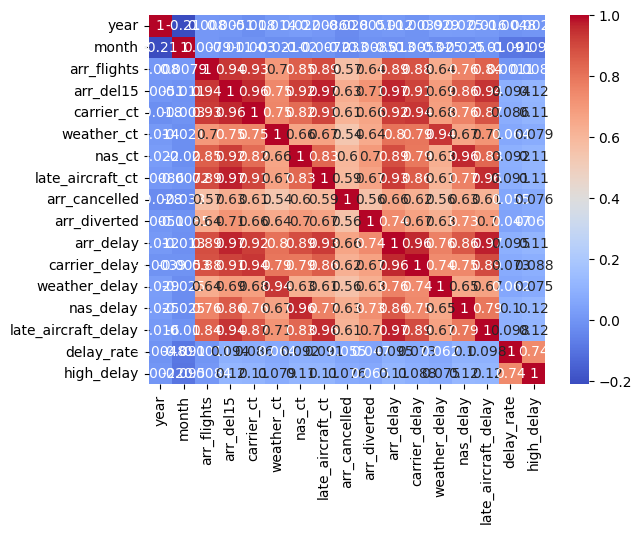

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
import joblib

joblib.dump(model, "/Users/khalidmahmood/Coding Workspace/Will-My-Flight-Be-Delayed/model/rf_regressor.pkl")
joblib.dump(model1, "/Users/khalidmahmood/Coding Workspace/Will-My-Flight-Be-Delayed/model/rf_classifier.pkl")

In [85]:
joblib.dump(X1.columns.tolist(), "/Users/khalidmahmood/Coding Workspace/Will-My-Flight-Be-Delayed/model/feature_columns.pkl")

['/Users/khalidmahmood/Coding Workspace/Will-My-Flight-Be-Delayed/model/feature_columns.pkl']